### Разностная схема (верхний уголок)

\begin{equation}
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = f(x, t)
\end{equation}

#### Функции

In [10]:
function u_init(x)
    if (x >= 0) &&  (x <= pi)
        return sin(x)
    else
        return 0
    end
end

u_init (generic function with 1 method)

In [2]:
function u_left(t)
    return 0
end

u_left (generic function with 1 method)

In [3]:
function f(x, t)
    return 0
end

f (generic function with 1 method)

#### Задание переменных и начальных параметров

In [4]:
# Начальные значения
a = 0
b = 10
t_0 = 0
T = 6
c = 1

1

In [45]:
# Число узлов
N = 6000
M = 3000

3000

In [46]:
# Cетка
t = LinRange(t_0, T, M + 1)
x = LinRange(a, b, N + 1);

In [47]:
# Размер шага сетки
h = (b - a) / N
tau = (T - t_0) / M

0.002

In [48]:
# Инициализация начальных значений
u = zeros(M + 1, N + 1);
u[1, :] = u_init.(x)
u[2:M + 1, 1] = u_left.(t[2:M + 1]);

#### Решение и визуализация

In [49]:
for m in 1:M
    for n in 2:(N + 1)
        u[m + 1, n] = 1 / (h + c * tau) * (tau * h * f(x[n], t[m]) + h * u[m, n] + c * tau * u[m + 1, n - 1])
    end
end

In [12]:
using Plots


(process:23276): GLib-GIO-WARNING **: 14:40:47.279: Unexpectedly, UWP app `HaukeGtze.7-ZipFileManagerUnofficial_1.2107.2.0_x64__6bk20wvc8rfx2' (AUMId `HaukeGtze.7-ZipFileManagerUnofficial_6bk20wvc8rfx2!zFM.exe') supports 36 extensions but has no verbs

(process:23276): GLib-GIO-WARNING **: 14:40:47.390: Unexpectedly, UWP app `6760NGPDFLab.PDFX_1.3.44.0_x64__sbe4t8mqwq93a' (AUMId `6760NGPDFLab.PDFX_sbe4t8mqwq93a!App') supports 32 extensions but has no verbs


In [64]:
anim = @animate for i in 1:10:length(t)
    plot(x, u[i, :], legend=false, xlims=(0, 10), ylims=(0, 1))
end

Animation("C:\\Users\\aleks\\AppData\\Local\\Temp\\jl_YzIwFR", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000292.png", "000293.png", "000294.png", "000295.png", "000296.png", "000297.png", "000298.png", "000299.png", "000300.png", "000301.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\aleks\Documents\Projects\Comp math\simple_diff_el_6000_3000.gif
└ @ Plots C:\Users\aleks\.julia\packages\Plots\lW9ll\src\animation.jl:137


Plots.AnimatedGif("C:\\Users\\aleks\\Documents\\Projects\\Comp math\\simple_diff_el_6000_3000.gif")
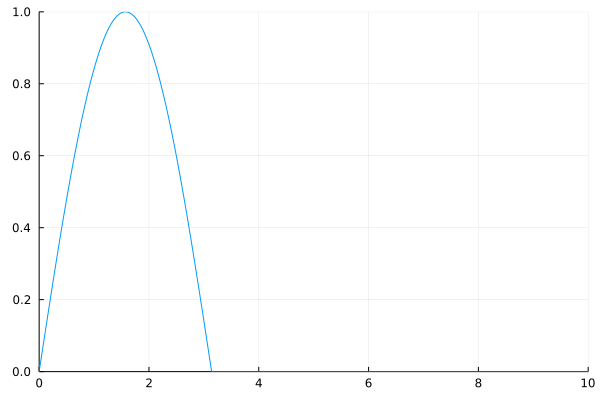

In [69]:
gif(anim, "simple_diff_el_6000_3000.gif", fps=30)